In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prepare
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from scipy.spatial.distance import  cdist
# from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
import copy
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import prepare
import KNN
import SVM
from IPython.display import display

In [130]:
def convertToBinary(bool_condition):
        if bool_condition:
            return 1
        return -1
or_id = 0
itay_id = 3
df = pd.read_csv('train_clean.csv.csv')
df.pop('pcr_date')
df.pop("Unnamed: 0")
df.pop('country')
df.pop('home_country')
df.pop('postcode')
df.pop('PCR_05')
df.pop('is_army')

# target
df['spread'] = df['spread'].map(dict(High=1 , Low = -1))
df['risk'] = df['risk'].map(dict(High=1 , Low = -1))
# df['covid'] = df['covid'].apply(convertToBinary)
df['covid'] = df['covid']*2-1
# rest fectures
df['sex'] = df['sex'].replace(['F','M'],[-1,1])

# normolize data 
df_normolize = prepare.normalize_data(df.copy())
# display(df)


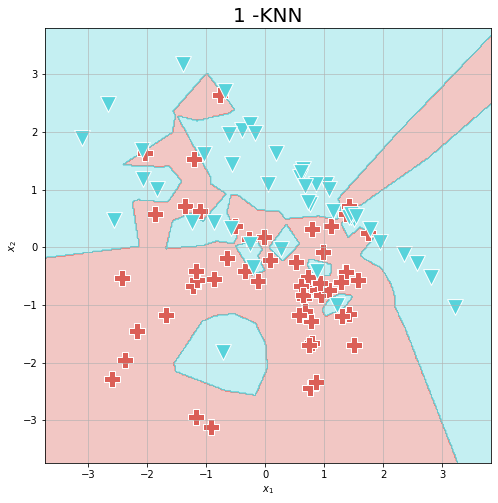

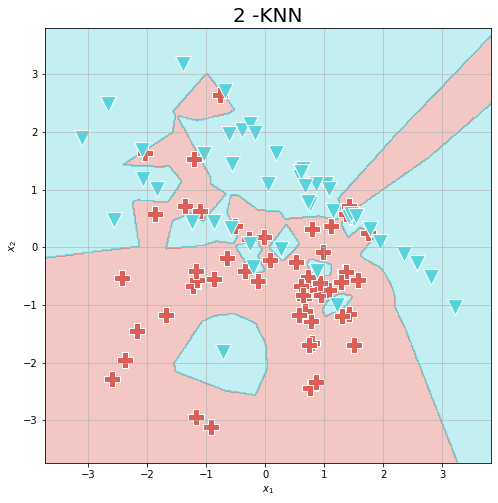

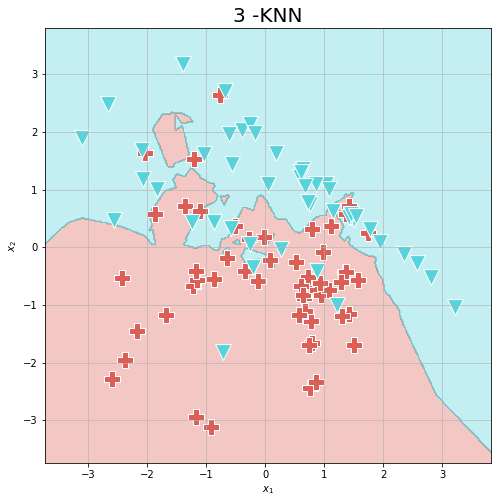

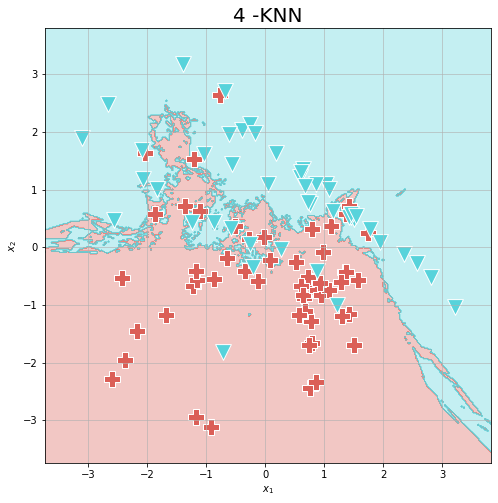

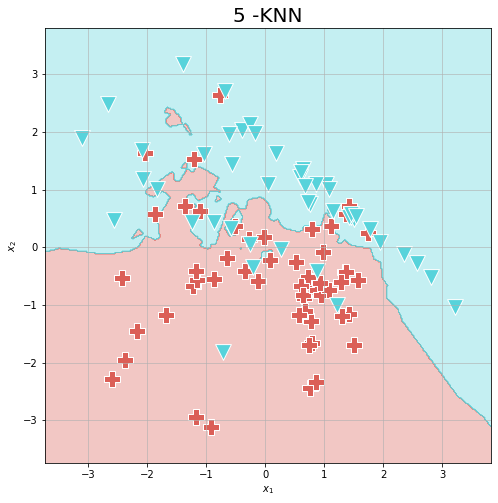

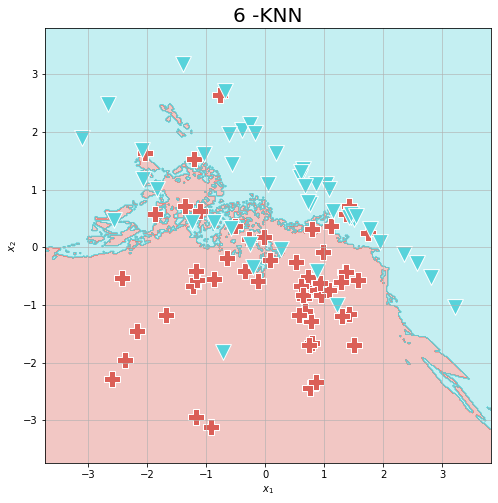

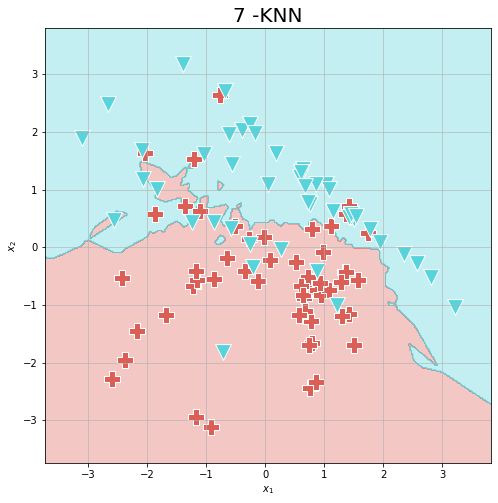

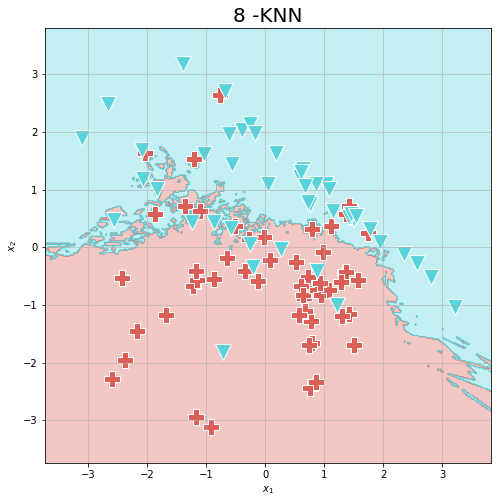

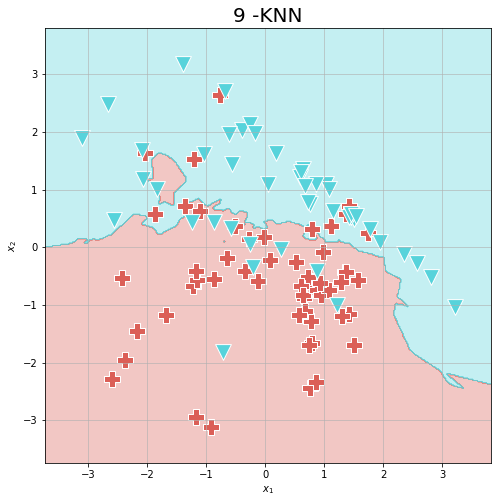

In [100]:
def Q1():
    X_toy, y_toy = make_classification(n_samples=100, n_features=2,random_state=or_id+itay_id, flip_y = 0.1,n_informative=2, n_redundant=0)
    for i in range(1,10,1):
        model = KNN.kNN(i)
        model.fit(X_toy,y_toy)
        KNN.visualize_clf(model, X_toy, y_toy,f"{i} -KNN")
        predict = model.predict(X_toy)
Q1()

In [101]:
def Q2(df):
    temp_df = df.copy()
    temp_df.pop('risk')
    temp_df.pop('covid')
    s = temp_df.corr().spread.abs()
    s = s.sort_values(ascending=False)
    print(s[:11])
Q2(df)

spread                   1.000000
PCR_10                   0.132957
PCR_07                   0.064828
household_income         0.053053
sport_activity           0.044553
blood_type_O+            0.028198
shortness_of_breath      0.027824
PCR_04                   0.026156
conversations_per_day    0.025367
num_of_siblings          0.019521
age                      0.019385
Name: spread, dtype: float64


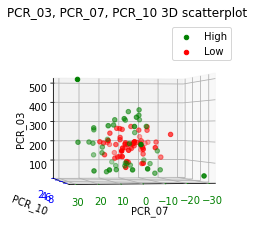

In [102]:
def Q3(df):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    n = 100
    ax.tick_params(axis='x', colors='green')
    ax.tick_params(axis='y', colors='blue')
    ax.tick_params(axis='z', colors='black')
    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    samples = df.sample(n= n )
# for m, zlow, zhigh in [('o', -50, -25)]:
    m='o'
    if (samples['spread'].dtypes == np.int64 ):
        samples1 = samples[samples['spread'] == 1]
        samples2 = samples[samples['spread'] == -1]
    else:
        samples1 = samples[samples['spread'] == 'High']
        samples2 = samples[samples['spread'] == 'Low']

    pcr03 = samples1['PCR_03'].values
    pcr07 = samples1['PCR_07'].values
    pcr10 = samples1['PCR_10'].values
    ax.scatter(pcr07, pcr10, pcr03, marker='o', c= 'green',label='High')
    pcr03 = samples2['PCR_03'].values
    pcr07 = samples2['PCR_07'].values
    pcr10 = samples2['PCR_10'].values
    ax.scatter(pcr07, pcr10, pcr03, marker='o', c='red',label='Low')
    ax.set_zlabel('PCR_03')
    ax.set_ylabel('PCR_10')
    ax.set_xlabel('PCR_07')
    ax.set_title('PCR_03, PCR_07, PCR_10 3D scatterplot')
    ax.view_init(0, 80)
    # plt.xlabel('PCR_03')
    # plt.ylabel('PCR_10')
    # plt.zlabel('PCR_07')
    ax.legend()
    # plt.legend()
    plt.savefig('PCR_03_PCR_07_PCR_10_3D_scatterplot.png')
    plt.show()
    
Q3(df)

In [103]:
def Q4(df):
    #dry
    pass

In [104]:
def Q5(df):
    # df['spread'] = df['spread'].map(dict(High=1 , Low = -1))
    # arr = df[['PCR_03','PCR_07','PCR_10','spread']].to_numpy()
    my_knn = KNN.kNN(n_neighbors=11)
    my_knn = my_knn.fit(df[['PCR_03','PCR_07','PCR_10']], df['spread'])
    print(my_knn.score(my_knn.data, my_knn.targets))
Q5(df)

0.8202597402597402


In [105]:
def Q6(df):
    # dry
    pass

In [106]:
def normalize(df,row,process):
    temp = df[row].values.reshape(-1, 1)
    df[row] = process.fit_transform(temp)
    return df
def Q7(df):
    plt.show()
    print(df['PCR_03'].min(),df['PCR_03'].max(),df['PCR_03'].mean())
    print(df['PCR_07'].min(),df['PCR_07'].max(),df['PCR_07'].mean())
    print(df['PCR_10'].min(),df['PCR_10'].max(),df['PCR_10'].mean())
    df = normalize(df=df,row='PCR_03',process=preprocessing.StandardScaler())
    df = normalize(df=df,row='PCR_07',process=preprocessing.StandardScaler())
    df = normalize(df=df,row= 'PCR_10',process=preprocessing.StandardScaler())
    print(df['PCR_03'].min(),df['PCR_03'].max(),df['PCR_03'].mean())
    print(df['PCR_07'].min(),df['PCR_07'].max(),df['PCR_07'].mean())
    print(df['PCR_10'].min(),df['PCR_10'].max(),df['PCR_10'].mean())
    #df = normalize(df=df, row='PCR_10', process=preprocessing.StandardScaler())
    my_knn = KNN.kNN(n_neighbors=11)
    # print the knn score
    my_knn = my_knn.fit(df[['PCR_03','PCR_07','PCR_10']], df['spread'])
    print(my_knn.score(my_knn.data, my_knn.targets))
Q7(df)

-16.743388486880384 493.0027048584474 188.4049388613704
-28.760721344245727 28.802512001788696 0.19562224447812554
1.0 9.0 5.089350649350649
-2.0881858147767196 3.1004724356734927 2.9635745517072036e-16
-2.7235274237705966 2.6906590786952047 3.3681571240576175e-17
-3.0776389331833474 2.9431486139487095 7.866723145915394e-17
0.9225974025974026


In [107]:
def Q8(df):
    # dry
    pass

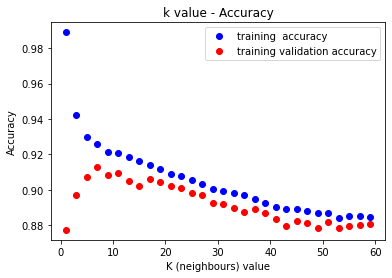

0.8924150674273857
0.9056006170838121
0.9127225968188104


In [112]:
def Q9(df):
    k = np.arange(1, 61, 2)
    train_scores, valid_scores = validation_curve(
        estimator=KNN.kNN(),
        X=df[['PCR_03', 'PCR_07', 'PCR_10']],
        y=df['spread'],
        param_name="n_neighbors",
        param_range = np.arange(1, 61, 2),
        cv=8)
    train_mean = train_scores.mean(axis=1)
    valid_mean = valid_scores.mean(axis=1)
    plt.plot(k,train_mean,'bo', label="training  accuracy")
    plt.plot(k, valid_mean, 'ro',label="training validation accuracy")
    plt.ylabel('Accuracy')
    plt.xlabel('K (neighbours) value')
    plt.title("k value - Accuracy")
    plt.legend(loc='best')
    plt.savefig('k-value-Accuracy.png')
    plt.show()
    k = valid_mean.max()
    print(valid_mean.mean())
    print(train_mean.mean())
    print(k)
Q9(df_normolize)

[[898  53]
 [123 851]]


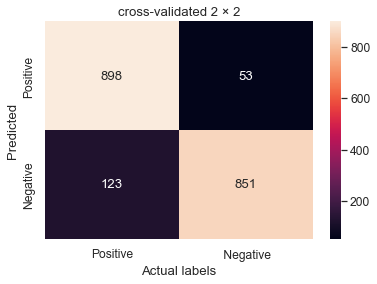

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def Q10(df:pd.DataFrame,k=9):
    my_knn = KNN.kNN(n_neighbors=k)
    X = df[['PCR_03', 'PCR_07', 'PCR_10']]
    y = df['spread']
    y_pred = cross_val_predict(my_knn, X, y, cv=8)
    conf_mat = confusion_matrix(y, y_pred)
    print(conf_mat)
    sn.set(font_scale=1.1)  # for label size
    conf_mat = pd.DataFrame(conf_mat,range(2), range(2))
    xlabels = ['Positive',' Negative']
    ylabels = ['Positive', 'Negative']
    ax = sn.heatmap(conf_mat, xticklabels=xlabels,yticklabels=ylabels, fmt='g',annot=True)
    ax.set_title('cross-validated 2 × 2')
    ax.set_xlabel('Actual labels')
    ax.set_ylabel('Predicted')
    plt.show()
Q10(df_normolize)


In [114]:
def Q11():
    # dry
    pass
    

In [115]:
def Q12(df):
    temp_df = df.copy()
    temp_df.pop('covid')
    temp_df.pop('spread')
    s = temp_df.corr().risk.abs()
    s = s.sort_values(ascending=False)
    print(s[:11])
Q12(df_normolize)

risk              1.000000
sugar_levels      0.287637
PCR_06            0.184797
sport_activity    0.105596
age               0.101714
PCR_03            0.053002
PCR_07            0.043751
PCR_02            0.036989
PCR_01            0.032614
blood_type_B-     0.028734
fever             0.023476
Name: risk, dtype: float64


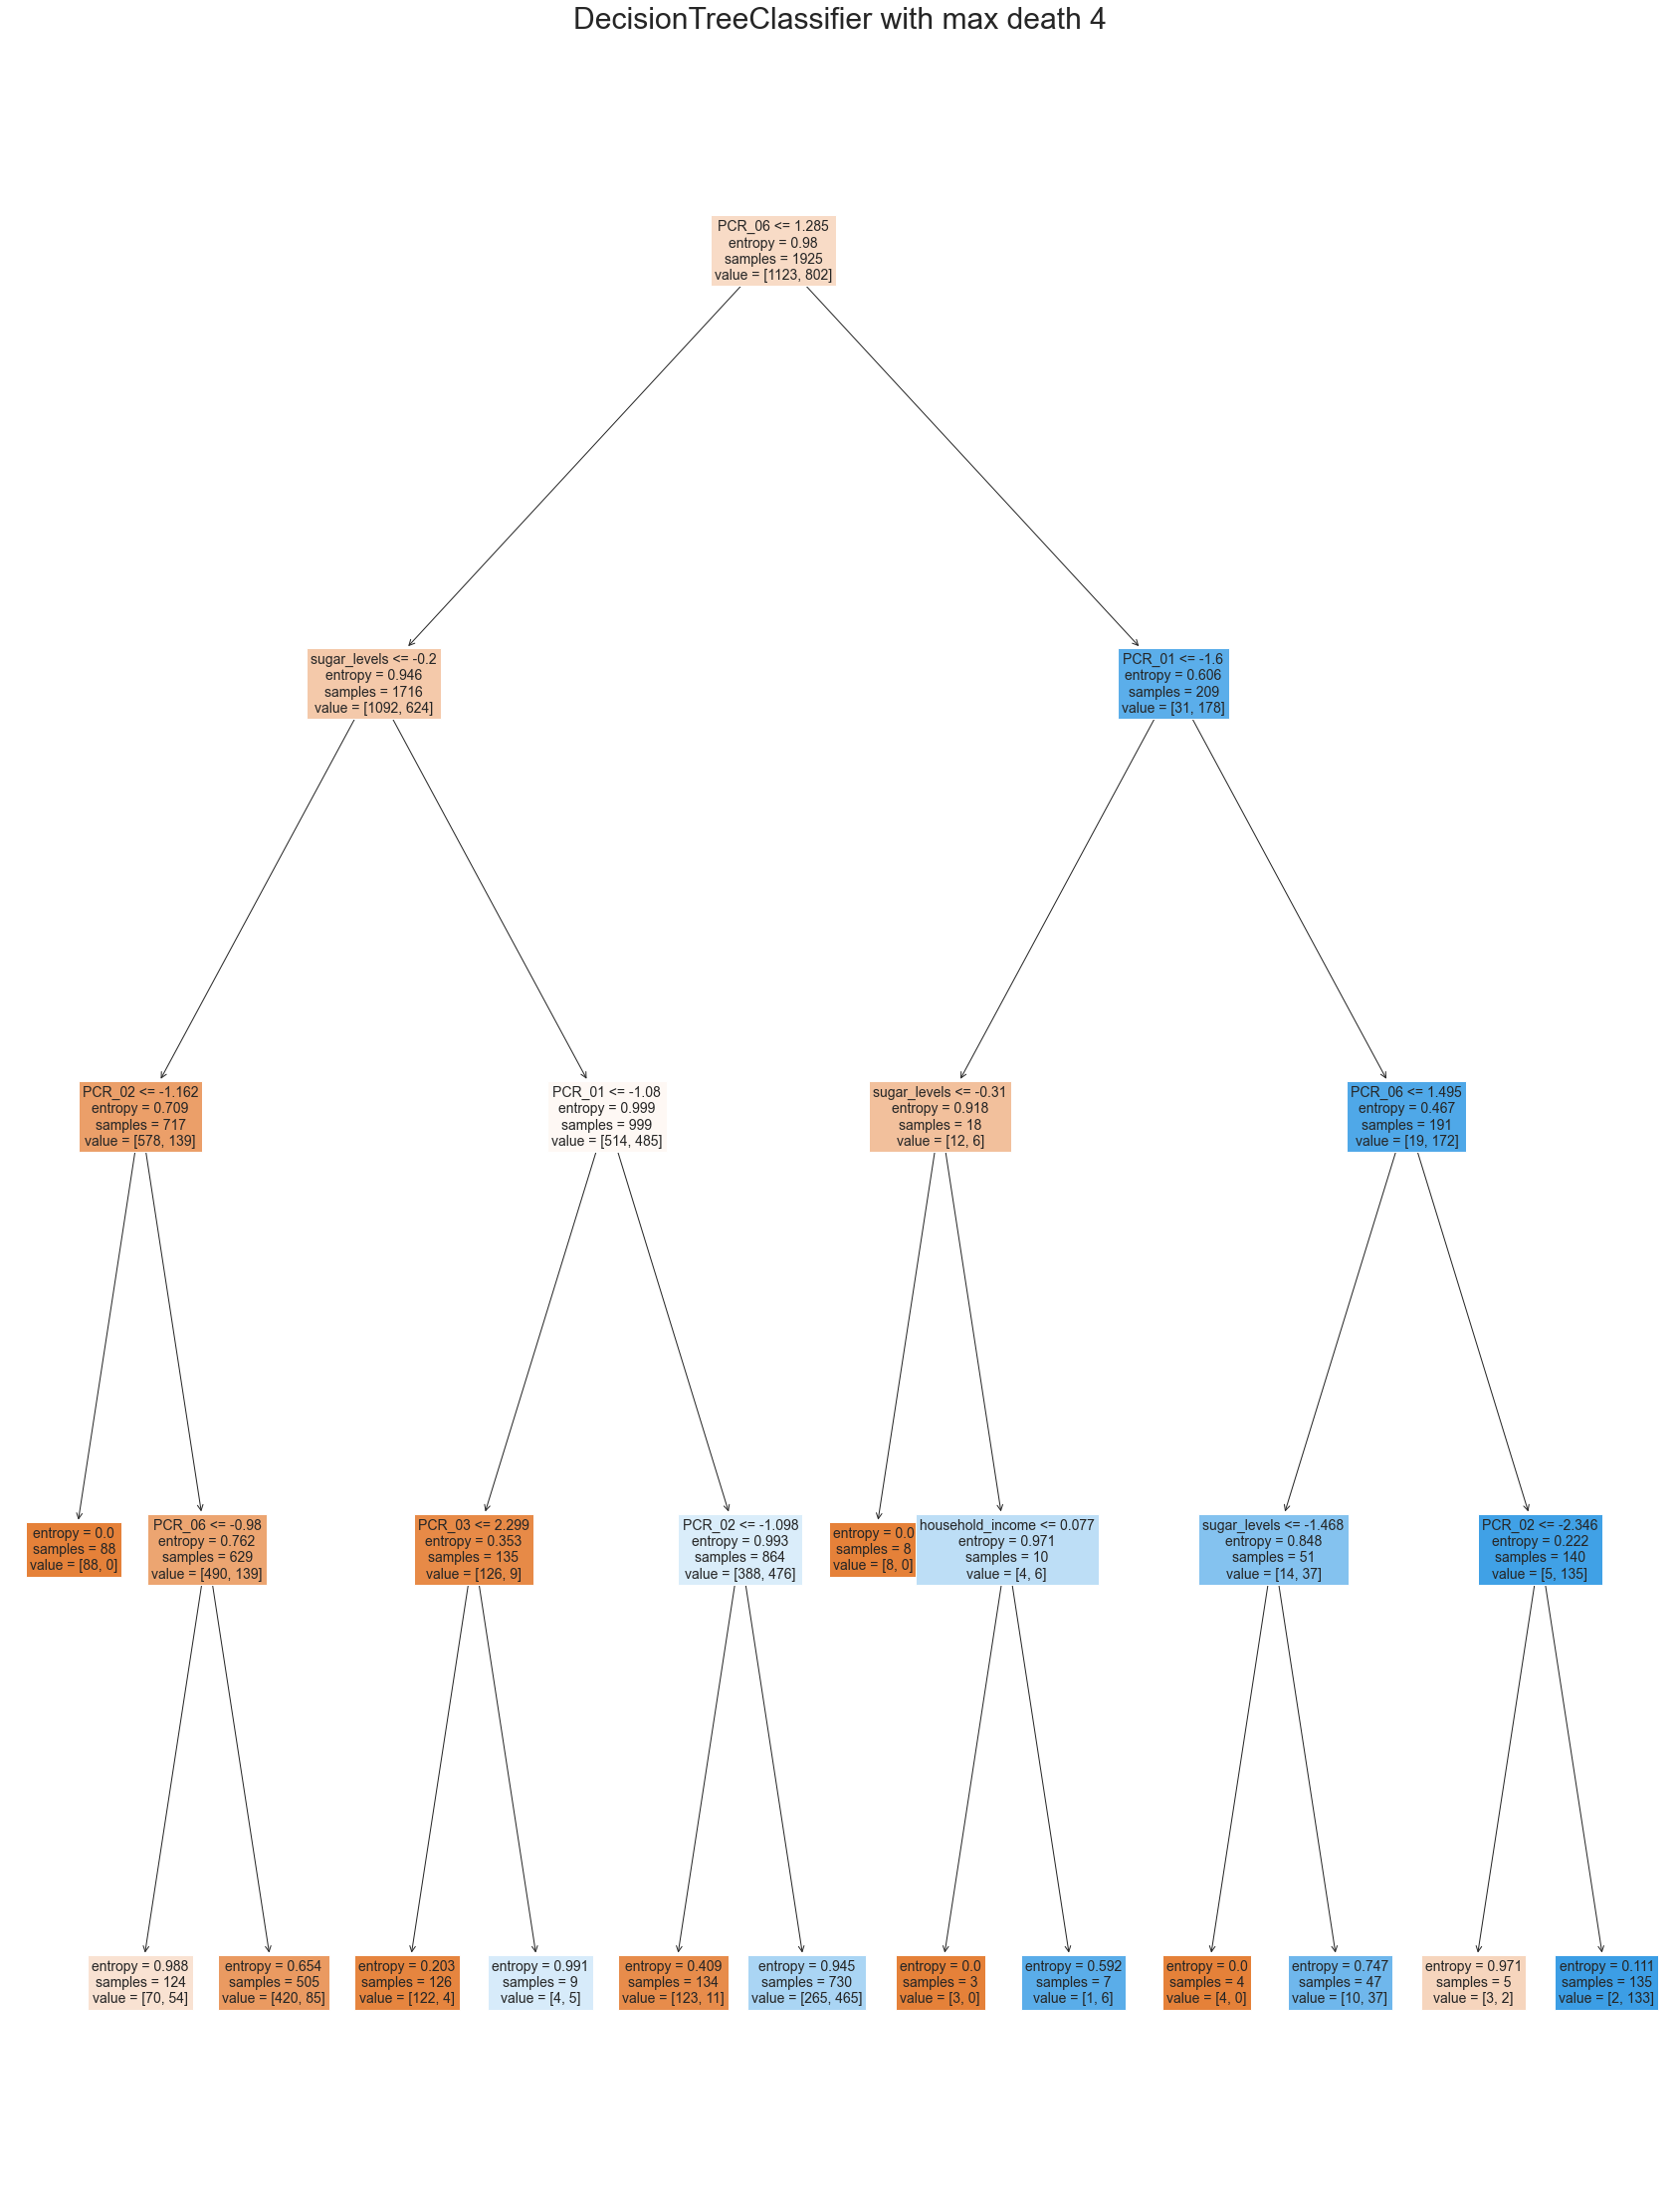

0.7724675324675324


In [121]:
def Q13(df):
    
    # df =  pd.read_csv('train_clean.csv.csv')
    # df = prepare.normalize_data(df)
    # df = prepare.create_number_convention(df)
    model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4)
    # drop
    # df = df.drop(['Unnamed: 0','covid','spread','PCR_05'], axis=1)
    X = df
    Y = df['risk']
    X= X.drop(['risk'], axis=1)
    
    # X = np.float32(X)
    # Y = np.float(Y)

    # X = np.nan_to_num(X, nan=-9999, posinf=33333333, neginf=33333333)
    # Y = np.nan_to_num(Y, nan=-9999, posinf=33333333, neginf=33333333)
    model.fit(X,Y)
    plt.figure(figsize=(30, 40))
    tree.plot_tree(model,filled=True,fontsize=14,feature_names=X.columns)
    plt.title('DecisionTreeClassifier with max death 4',fontsize=30)
    plt.savefig('DecisionTreeClassifier.png',dpi=100)
    plt.show()

    predict = model.predict(X)
    risk = accuracy_score(Y, predict)
    print(risk)
Q13(df_normolize)

In [122]:
def Q14(df):
    # dry
    pass

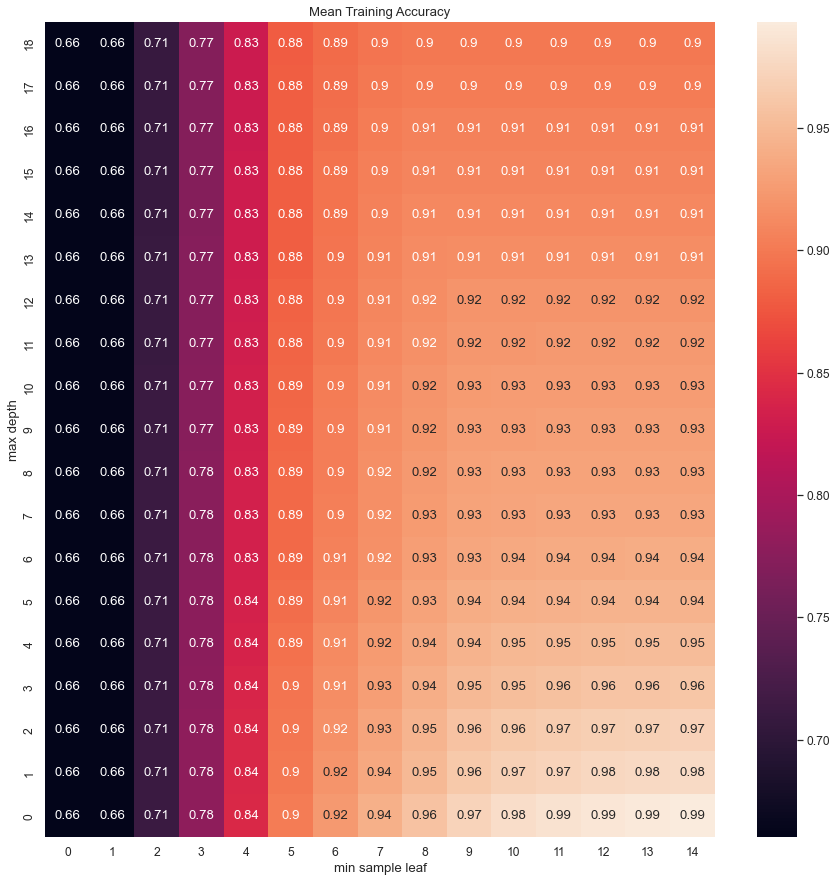

In [139]:
from sklearn.model_selection import GridSearchCV
def Q15(df):
    y  = df.pop('risk')
    df.pop('spread')
    df.pop('covid')
    x = df
    max_depth = [i for i in range(1,16)]
    min_samples_leaf =[i for i in range(1,20)]
    params = {'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}
    dtree = tree.DecisionTreeClassifier(random_state=0,criterion='entropy')
    clf = GridSearchCV(dtree,params,cv=8,return_train_score=True)
    clf.fit(x,y)
    test_score = clf.cv_results_['mean_test_score'].reshape(len(max_depth),len(min_samples_leaf))
    train_score = clf.cv_results_['mean_train_score'].reshape(len(max_depth), len(min_samples_leaf))
    plt.figure(figsize=(15, 15))
    ax = sns.heatmap(train_score.T,annot=True)
    ax.invert_yaxis()
    plt.title('Mean Training Accuracy')
    plt.xlabel('min sample leaf')
    plt.ylabel('max depth')
    plt.savefig('Mean_Validation_Accurac.png',dpi=100)
    plt.show()
Q15(df=df_normolize.copy())

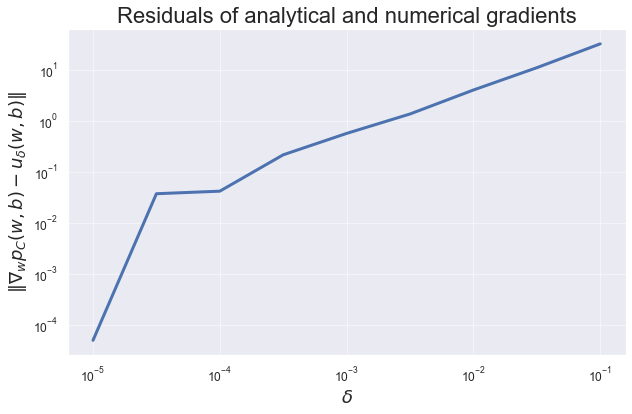

In [126]:
def Q16(X_train, y_train):
    SVM.compare_gradients(X_train, y_train, deltas=np.logspace(-5, -1, 9))
svm_df = df_normolize.copy()
svm_df.pop('covid')
svm_df.pop('risk')
svm_df.pop('spread')
Q16(svm_df.values, df_normolize['covid'].values)

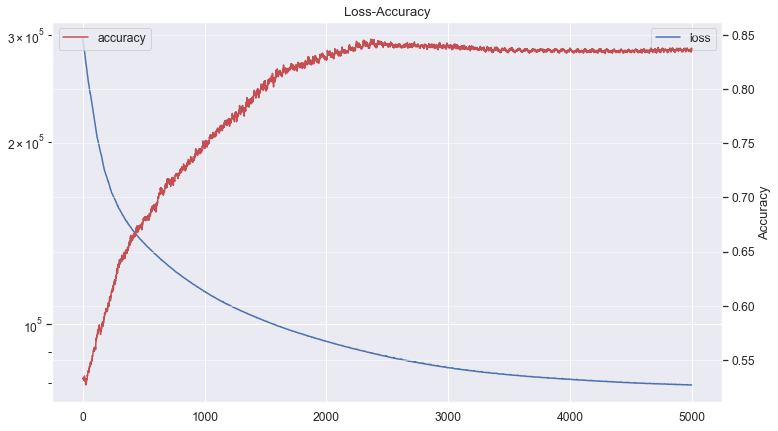

In [ ]:
import SVM
def Q17(X,y):
    clf = SVM.SoftSVM(C=1e2, lr=1e-5)
    losses, accuracies = clf.fit_with_logs(X, y, max_iter=5000)
    fig = plt.figure(figsize=(12, 7))
    ax1 = fig.add_subplot(111)
    line1 = ax1.semilogy(losses, c='b', label='loss')
    ax2 = ax1.twinx()
    line2 = ax2.plot(accuracies, c='r', label='accuracy')
    ax2.grid(alpha=0.5)
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')
    plt.title('Loss-Accuracy')
    ax1.legend()
    ax2.legend()
    plt.savefig('Loss_Accuracy.png',dpi=100)
    plt.show()
svm_df = df_normolize.copy()
# svm_df.pop('is_army')
svm_df.pop('covid')
svm_df.pop('risk')
svm_df.pop('spread')
Q17(svm_df.values, df_normolize['covid'].values)

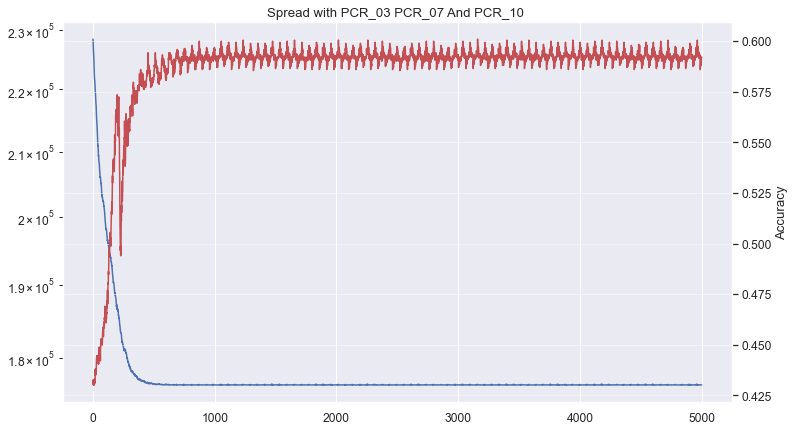

In [161]:
def Q18(X,y):
    clf = SVM.SoftSVM(C=1e2, lr=1e-5)
    losses, accuracies = clf.fit_with_logs(X, y, max_iter=5000)
    fig = plt.figure(figsize=(12, 7))
    ax1 = fig.add_subplot(111)
    line1 = ax1.semilogy(losses, c='b', label='?')
    ax2 = ax1.twinx()
    line2 = ax2.plot(accuracies, c='r', label='?')
    ax2.grid(alpha=0.5)
    plt.title('Spread with PCR_03 PCR_07 And PCR_10 ')
    plt.xlabel('iteration')
    plt.ylabel('Accuracy')
    plt.savefig('spread_new.png',dpi=100)
    plt.show()
Q18(df_normolize[['PCR_03', 'PCR_07', 'PCR_10']].values, df['spread'].values)

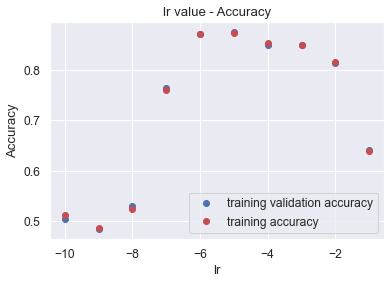

0.8742976313969573


In [163]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
def Q19(X,y):
    # C: float, lr: float = 1e-5
     
    poly = PolynomialFeatures()
    X = poly.fit_transform(X)
    k = np.logspace(-10, -1, 10)
    train_scores, valid_scores = validation_curve(
        estimator=SVM.SoftSVM(C=1000),
        X=X,
        y=y,
        param_name="lr",
        param_range=k ,
        cv=8)
    train_mean = train_scores.mean(axis=1)
    valid_mean = valid_scores.mean(axis=1)

    plt.plot(range(-10,0), train_mean, 'bo', label="training validation accuracy")
    plt.plot(range(-10,0), valid_mean, 'ro', label="training accuracy")
    plt.xlabel('lr')
    plt.ylabel('Accuracy')
    plt.title("lr value - Accuracy")
    plt.legend(loc='best')
    plt.savefig('lr_value_Accuracy.png',dpi=100)
    plt.show()
    k = valid_mean.max()
    print(k)
Q19(df_normolize[['PCR_03', 'PCR_07', 'PCR_10']].values, df['spread'].values)

In [164]:
def Q20():
    #dry
    pass

In [165]:
def Q21():
    #DRY
    pass